# Downloading Data for Local Use

These commands download all the necessary data to work locally for convenience.  
Note: The `aws configure` command requires your AWS Access Key ID and Secret Access Key, which should be stored securely in a `.env` file that is ignored by Git (via `.gitignore`).  
A `ls` command is run beforehand to ensure no file names are misdefined.

```bash
aws configure

poetry run aws s3 ls s3://zrive-ds-data/groceries/box_builder_dataset/
poetry run aws s3 cp s3://zrive-ds-data/groceries/box_builder_dataset/feature_frame.csv ./feature_frame.csv

- Add dependency: poetry add scikit-learn

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib
from typing import Tuple
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

plt.style.use("bmh")

In [2]:
RUTE = "../../data/"
FEATURE_FRAME_CSV = f"{RUTE}feature_frame.csv"

In [3]:
feature_frame = pd.read_csv(FEATURE_FRAME_CSV)
feature_frame.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [4]:
feature_frame.tail()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
2880544,33826439594116,healthcarevitamins,3643254800516,3893722808452,2021-03-03 13:19:28,2021-03-03 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880545,33826439594116,healthcarevitamins,3643274788996,3883757174916,2021-03-03 13:57:35,2021-03-03 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880546,33826439594116,healthcarevitamins,3643283734660,3874925314180,2021-03-03 14:14:24,2021-03-03 00:00:00,7,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880547,33826439594116,healthcarevitamins,3643294515332,3906490826884,2021-03-03 14:30:30,2021-03-03 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880548,33826439594116,healthcarevitamins,3643301986436,3914253959300,2021-03-03 14:42:05,2021-03-03 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392


- Rows are ordened from oldest to newest

In [5]:
feature_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

- There are columns that have been previously computed such as normalised_price and discount_pct

In [6]:
info_cols = ["variant_id", "order_id", "user_id", "created_at", "order_date"]
label_col = ["outcome"]

features_cols = [col for col in feature_frame.columns if col not in info_cols + label_col]

categorical_cols = ["product_type", "vendor"]
binary_cols = ["ordered_before", "abandoned_before", "active_snoozed", "set_as_regular"]

numerical_cols = [col for col in features_cols if col not in categorical_cols + binary_cols]

In [7]:
feature_frame["outcome"].value_counts()

outcome
0.0    2847317
1.0      33232
Name: count, dtype: int64

In [8]:
def push_relevant_dataframe (df: pd.DataFrame, min_products: int = 5) -> pd.DataFrame: 
    order_size = df.groupby("order_id").outcome.sum()
    orders_of_min_size = order_size [order_size >= min_products].index 
    return df.loc[lambda x: x.order_id.isin (orders_of_min_size)]

df = (
    feature_frame.pipe(push_relevant_dataframe)
    .assign(order_date=lambda x: pd.to_datetime(x.order_date).dt.date)
)

In [9]:
# Check if there are less user orders

df["outcome"].value_counts()

outcome
0.0    2132624
1.0      31329
Name: count, dtype: int64

<Axes: >

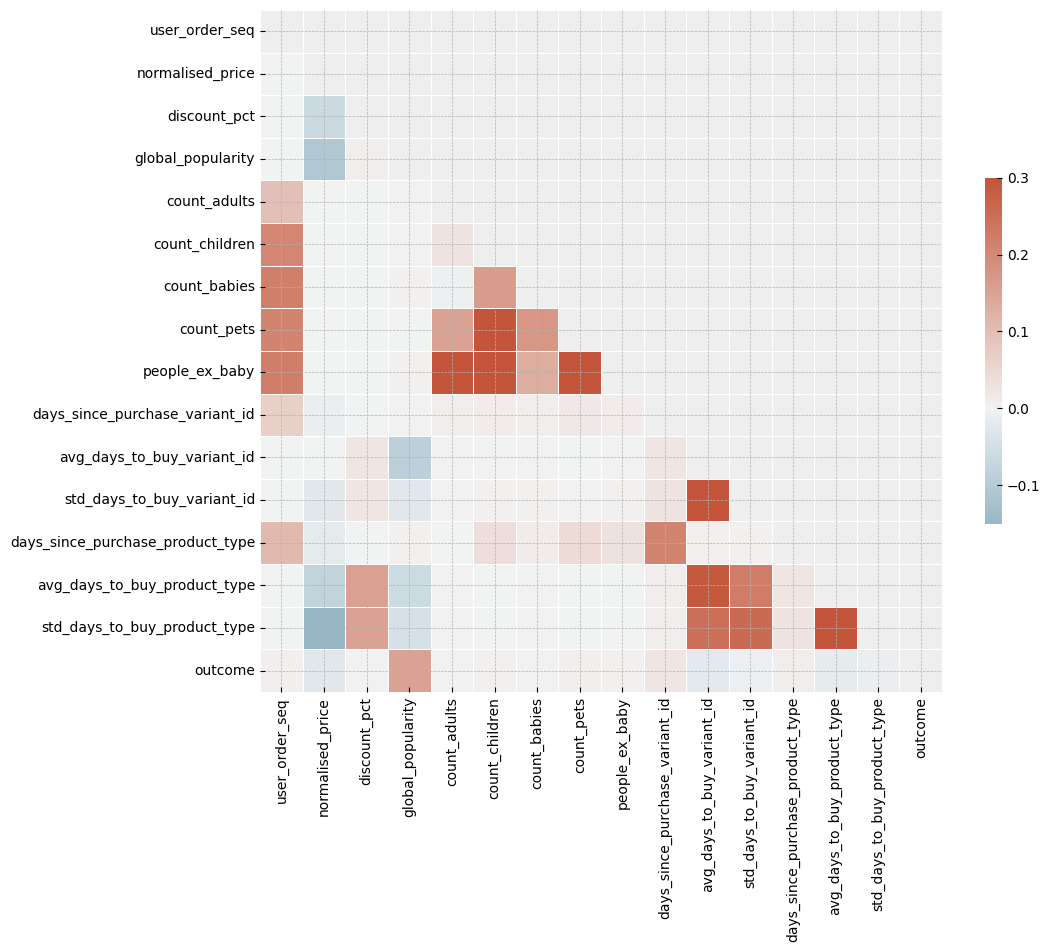

In [10]:
# Visualize correlation matrix

corr = df[numerical_cols + label_col].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=0.3, 
            center=0, 
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": 0.5}
)

- Como se puede observar hay columnas como people_ex_baby y count_adults que tienen una fuerte correlación. Por ello, eliminamos columnas altamente correlacionadas.

- Además, global popularity es la columna que tiene más correlación con outcome. Por lo tanto, utilizaremos global popularity como baseline.

In [11]:
# Correlation with other features

df = df.drop('count_children', axis=1)
df = df.drop('count_pets', axis=1)
df = df.drop('people_ex_baby', axis=1)
df = df.drop('std_days_to_buy_variant_id', axis=1)
df = df.drop('avg_days_to_buy_product_type', axis=1)
df = df.drop('std_days_to_buy_product_type', axis=1)

In [12]:
# Eliminate duplicate features

irrelevant_cols = ["created_at"]
df = df.drop(columns=irrelevant_cols, errors="ignore")

In [13]:
daily_orders = feature_frame.groupby("order_date").order_id.nunique()
daily_orders.head()

order_date
2020-10-05 00:00:00     3
2020-10-06 00:00:00     9
2020-10-07 00:00:00    10
2020-10-08 00:00:00    14
2020-10-09 00:00:00     5
Name: order_id, dtype: int64

Text(0.5, 1.0, 'Daily Orders')

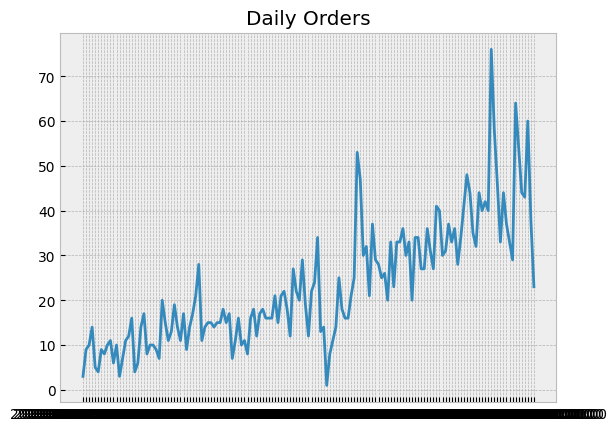

In [14]:
plt.plot(daily_orders, label="Daily orders")
plt.title("Daily Orders")

- Options to distribute data:
Random, stratified, time division 

- As shown in the graph, there has been an increase in the number of daily orders over time. This reflects a change in the business. Furthermore, since in production we would have the model and we would take the predictions based on the order history, we decided to reflect the time in the same way when training the model. This means that the train, validation, and test sets will be ordered from furthest to closest in time.

- Possible problems:
Many recent orders that make the cutoff dates very unbalanced and may not learn patterns such as seasonality, specific days or weeks (holidays, Black Friday, ...)

- Solution: 
Understand the business cycle, and set the cycle time.

In [15]:
cumsum_daily_orders = daily_orders.cumsum() / daily_orders.sum()
train_val_cutoff = cumsum_daily_orders [cumsum_daily_orders <= 0.7].idxmax() 
val_test_cutoff = cumsum_daily_orders [cumsum_daily_orders <= 0.9].idxmax()

print("Train since:", cumsum_daily_orders.idxmin())
print("Train until:", train_val_cutoff)
print("Val until:", val_test_cutoff)
print("Test until:", cumsum_daily_orders.idxmax())

Train since: 2020-10-05 00:00:00
Train until: 2021-02-07 00:00:00
Val until: 2021-02-23 00:00:00
Test until: 2021-03-03 00:00:00


In [16]:
train_df = feature_frame [feature_frame.order_date <= train_val_cutoff]
val_df = feature_frame [
    (feature_frame.order_date > train_val_cutoff)
    & (feature_frame.order_date <= val_test_cutoff)
]
test_df = feature_frame [feature_frame.order_date > val_test_cutoff]

### Baseline: 

As we have mentioned above, we use global popularity as baseline. In this way, we will see if it is worth having our model in production consuming resources.

In [17]:

def plot_metrics(
    y_pred: pd.Series, 
    y_test: pd.Series,
    figure: Tuple [matplotlib.figure. Figure, np.array] = None,
    title: str = "",
    label: str = "",
):
    precision_, recall_, _ = precision_recall_curve(y_test, y_pred) 
    pr_auc = auc(recall_, precision_)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score (y_test, y_pred)
    
    if figure is None:
        fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    else:
        fig, ax = figure

    if title:
        fig.suptitle(title)

    ax[0].plot(recall_, precision_, label=f"{label}AUC: {pr_auc:.2f}")
    ax[0].set_xlabel("Recall")
    ax[0].set_ylabel("Precision")
    ax[0].set_title(f"Precision-recall Curve")
    ax[0].legend()
    ax[1].plot(fpr, tpr, label=f"AUC: {roc_auc:.2f}")
    ax[1].set_xlabel("FPR")
    ax[1].set_ylabel("TPR")
    ax[1].set_title("ROC Curve")
    ax[1].legend()

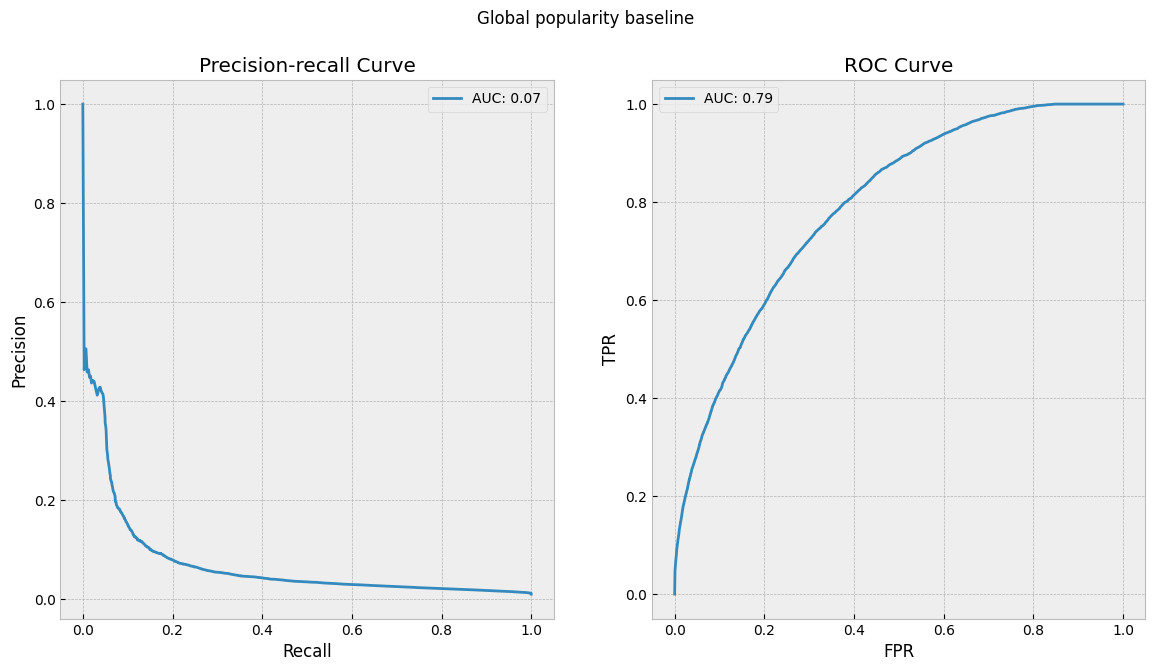

In [18]:
plot_metrics(
    y_pred=val_df["global_popularity"], y_test=val_df[label_col], title="Global popularity baseline"
)

### Categorical encoding

In [19]:
feature_frame["vendor"].value_counts()

vendor
biona         146828
ecover        113018
method         79258
organix        74632
treeoflife     68920
               ...  
minky            599
vitalbaby        594
munchkin         422
freee            336
vicks            243
Name: count, Length: 264, dtype: int64

In [20]:
feature_frame["product_type"].value_counts()

product_type
tinspackagedfoods         226474
condimentsdressings       129749
ricepastapulses           128098
haircare                  114978
cookingingredientsoils    110686
                           ...  
babyfood12months            6797
householdsundries           6735
petcare                     4075
feedingweaning              2790
premixedcocktails           2620
Name: count, Length: 62, dtype: int64

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

### Model training

In [22]:
def feature_label_split(df: pd.DataFrame, label_col: str )-> Tuple [pd.DataFrame, pd. Series]:
    return df.drop(label_col, axis=1), df[label_col]

X_train, y_train = feature_label_split(train_df, label_col)
X_val, y_val = feature_label_split(val_df, label_col)
X_test, y_test = feature_label_split(test_df, label_col)

### Ridge regression

c:\Users\eduez\AppData\Local\pypoetry\Cache\virtualenvs\zrive-ds-tukR1ct--py3.11\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


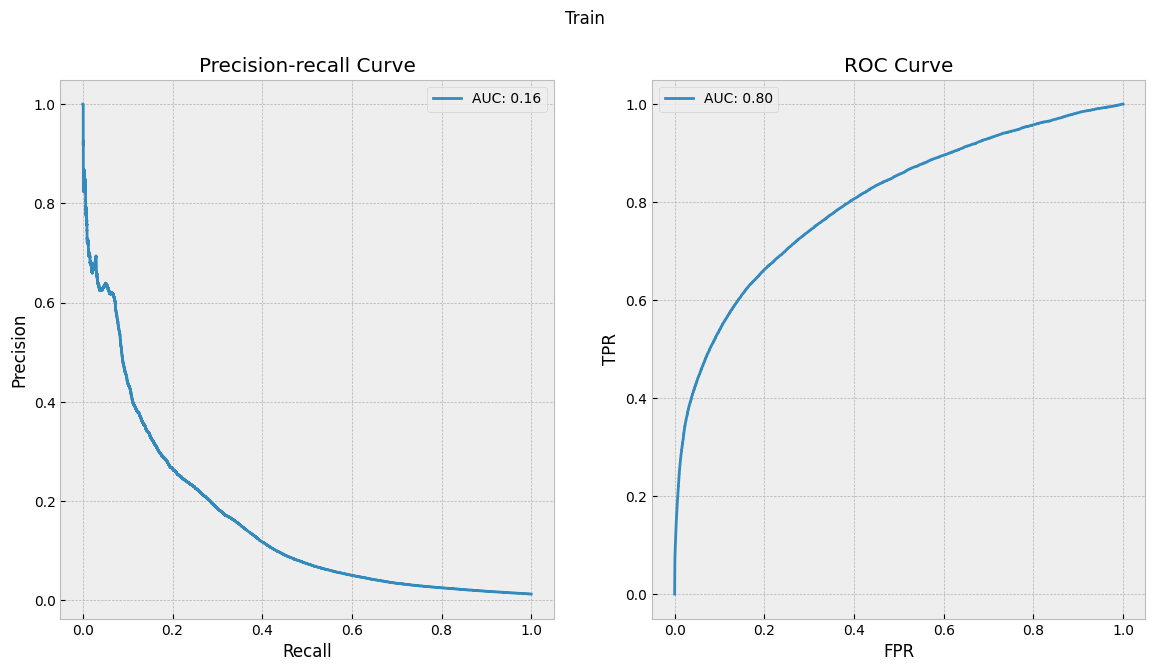

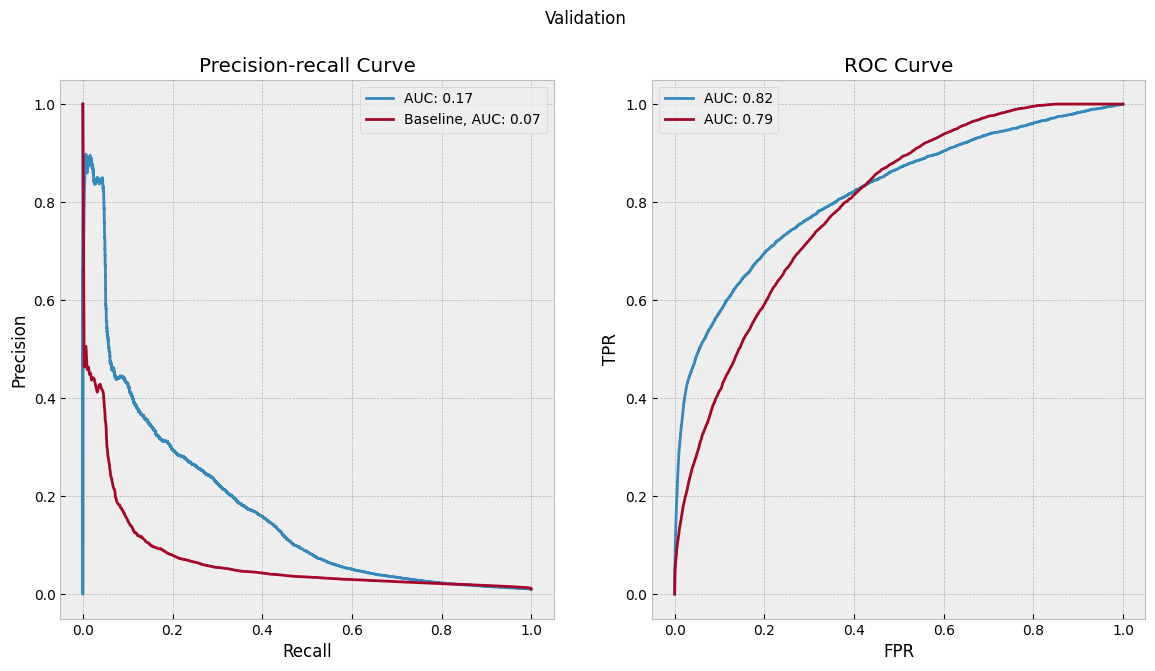

In [24]:
train_cols = numerical_cols + binary_cols + categorical_cols

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", "passthrough", numerical_cols),
        ("binary", "passthrough", binary_cols),
        ("categorical", categorical_preprocessor, categorical_cols),
    ]
)

lr = make_pipeline(
    preprocessor, StandardScaler(), LogisticRegression(penalty="l2")
)

lr.fit(X_train[train_cols], y_train)

train_proba = lr.predict_proba(X_train[train_cols])[:, 1]

plot_metrics(
    y_pred=train_proba, y_test=train_df[label_col], title="Train"
)

val_proba = lr.predict_proba(X_val[train_cols])[:, 1]

fig2, ax2 = plt.subplots(1, 2, figsize=(14, 7))

plot_metrics(
    y_pred=val_proba, 
    y_test=val_df[label_col],
    figure=(fig2, ax2),
    title="Validation", 
)

plot_metrics(
    y_pred=val_df["global_popularity"], 
    y_test=val_df[label_col],
    figure=(fig2, ax2),
    label="Baseline, "
)

- There is no overfitting because train and validation are similar

### Lasso regression

c:\Users\eduez\AppData\Local\pypoetry\Cache\virtualenvs\zrive-ds-tukR1ct--py3.11\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


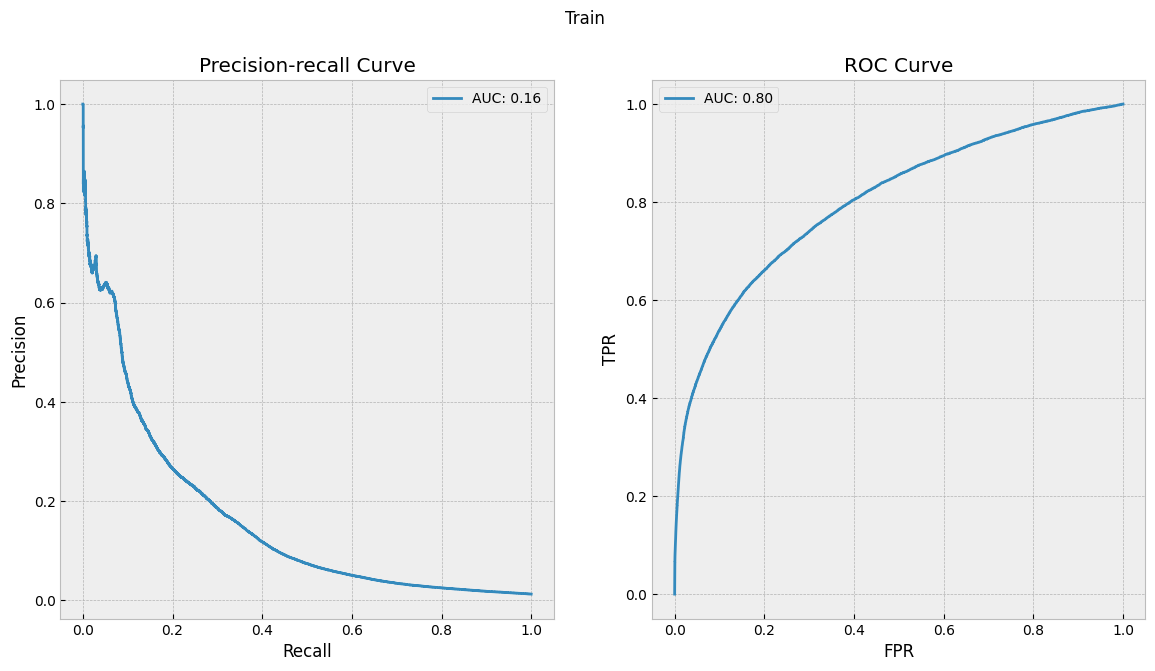

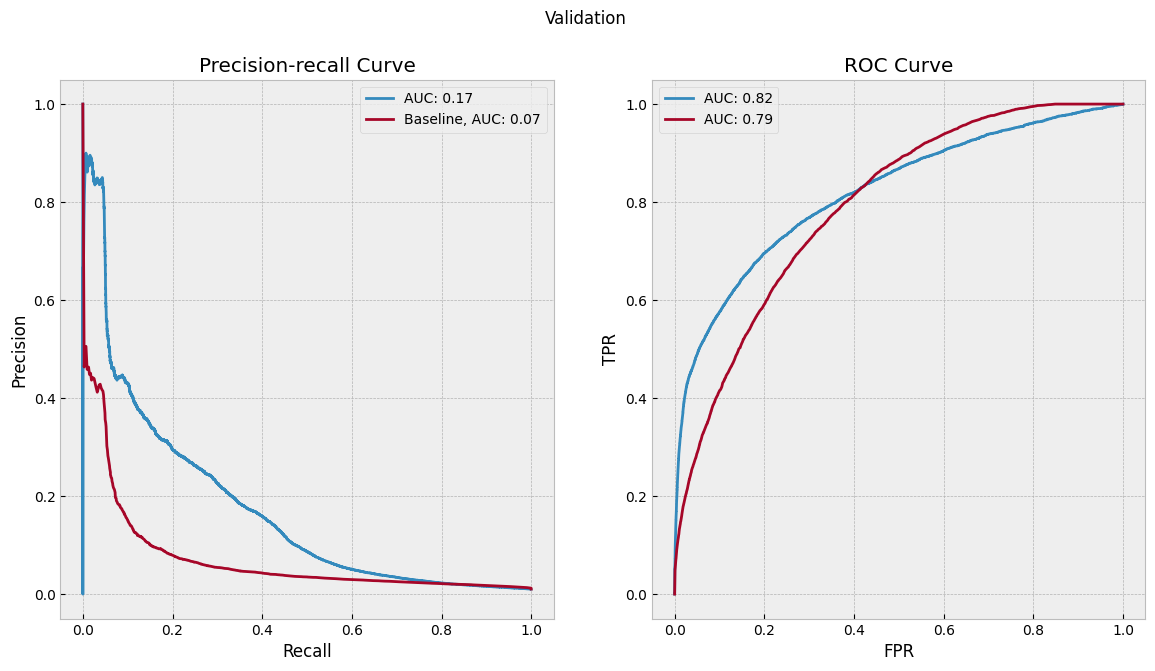

In [25]:
train_cols = numerical_cols + binary_cols + categorical_cols

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", "passthrough", numerical_cols),
        ("binary", "passthrough", binary_cols),
        ("categorical", categorical_preprocessor, categorical_cols),
    ]
)

lr = make_pipeline(
    preprocessor, StandardScaler(), LogisticRegression(penalty="l1", solver="saga")
)

lr.fit(X_train[train_cols], y_train)

train_proba = lr.predict_proba(X_train[train_cols])[:, 1]

plot_metrics(
    y_pred=train_proba, y_test=train_df[label_col], title="Train"
)

val_proba = lr.predict_proba(X_val[train_cols])[:, 1]

fig2, ax2 = plt.subplots(1, 2, figsize=(14, 7))

plot_metrics(
    y_pred=val_proba, 
    y_test=val_df[label_col],
    figure=(fig2, ax2),
    title="Validation", 
)

plot_metrics(
    y_pred=val_df["global_popularity"], 
    y_test=val_df[label_col],
    figure=(fig2, ax2),
    label="Baseline, "
)

- The perforamce is similar to Ridge
- Ridge and Lasso are better than the baseline.